# Reading Recipes with PyTesseract 
---
This is my attempt to test out how we can best translate photos of Cooks Illustrated magazines into text represenatations of recipes.

In [4]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
FILE_PATH = '/home/ryan/Pictures/tests/local-recipe/'
NUM_FILES = 9 # Number of files, named recipeN.jpeg

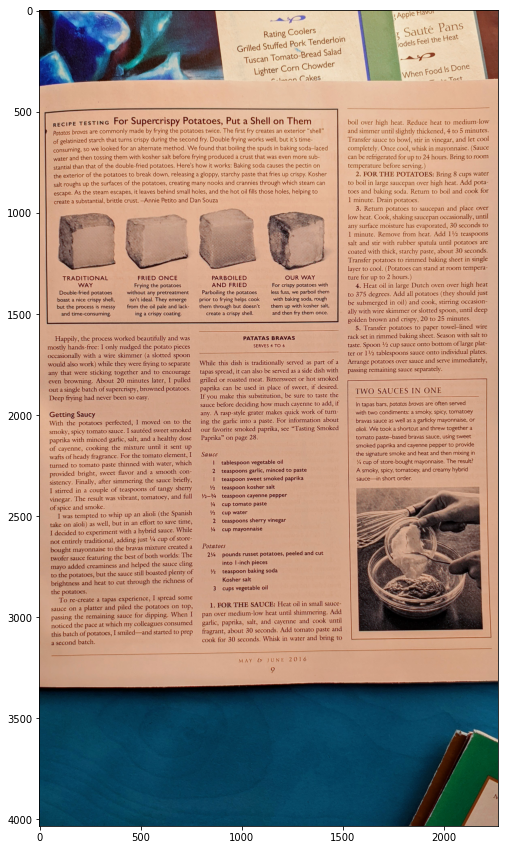

aeciPe TESTING For Supercrispy Potatoes, Put a Shell on Them

Patatas bravas > commonly made by fry

of gelatinized star

consuming, sO we ooked for
water and then tossing them
stantial than that of the do

the exterior of the potatoes to

salt roughs

h that turns crisp
that turns crispy

uble-fried p

with kosher

ytatoes

1g the pota

during the second fry

salt before frying pr

S twice The f t try

uble fry

an alternate method. We found that boiling

duced a crus

Here’s how it works: Baking s

sreak down, releasing a gloppy starchy paste that frie

p crispy. Kosher

up the surfaces of the potatoes, creating many nooks and crannies through which steam can

escape. As the steam escapes, it leaves behind small holes, and the hot oil fills those holes, helping to

create a substantia

TRADITIONAL
WAY
Double-fried potatoes
boast a nice crispy shell,
but the process is messy
and time-consuming.

Drittie crust

FRIED ONCE
Frying the potatoes
without any pretreatment
isn’t ideal. They e

In [5]:
FILES = ['recipe1.jpg']
# Basic reading and displaying the image as seen by our code
file1 = os.path.join(FILE_PATH, FILES[0])
img = cv2.imread(file1)
plt.figure(figsize=(25,15))
plt.imshow(img, cmap='gray')
plt.show()
print(pytesseract.image_to_string(img))

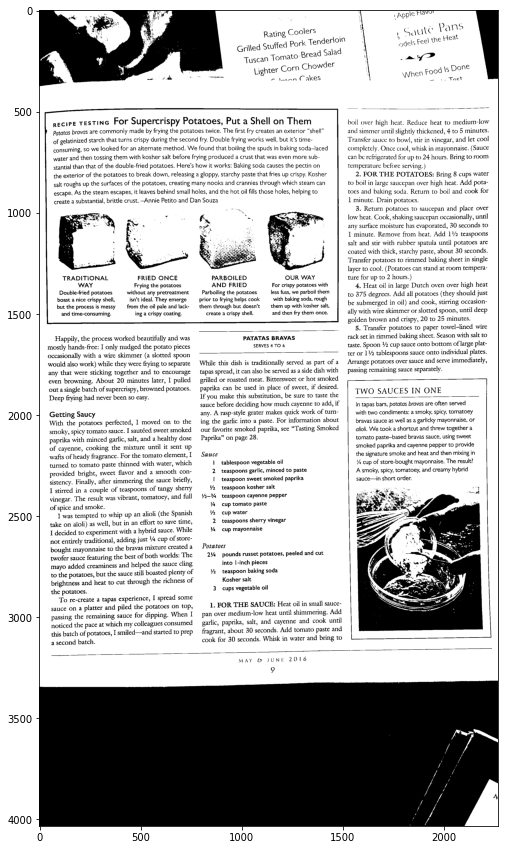

 

Rating Coolers .
Grilled Stuffed Pork Tenderio
Tuscan Tomato-Bread Sala

Lighter Corn Chowder
Co laaAnN Cakes

recipe TESTING For Supercrispy Potatoes, Put a Shell on Them
Patatas bravas are commonly made by frying the potatoes twice, The first fry creates an exterior “shell”
of gelatinized starch that turns crispy during the second fry. Double frying works well, but it’s time-
consuming, so we looked for an alternate method. We found that boiling the spuds in baking soda-laced
water and then tossing them with kosher salt before frying produced a crust that was even more sub-
stantial than that of the double-fried potatoes. Here’s how it works: Baking soda causes the pectin on
the exterior of the potatoes to break down, releasing a gloppy, starchy paste that fries up crispy. Kosher
salt roughs up the surfaces of the potatoes, creating many nooks and crannies through which steam can
escape. As the steam escapes, it leaves behind small holes, and the hot oil fills those holes, helping

In [6]:
# Using threshold  approach
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, new_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
plt.figure(figsize=(25,15))
plt.imshow(new_img, cmap='gray')
plt.show()
print(pytesseract.image_to_string(new_img))

In [10]:
# Drawing rectangles around chunks of text to classify them
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

# Applying dialation using our new kernel
dilated_img = cv2.dilate(new_img, rect_kernel, iterations=1)
# plt.figure(figsize=(25,15))
# plt.imshow(dilated_img)
# plt.show()

# Find countors
contours, hierarchy = cv2.findContours(dilated_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
copy_img = img.copy()

OUTPUT_FILE = 'output.txt'
with open(OUTPUT_FILE, 'w+') as f:
    f.write("")
f.close()

mask = np.zeros(img.shape, np.uint8)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cropped = copy_img[y:y+h, x:x+w]
    
    with open(OUTPUT_FILE, "a") as f:
        text = pytesseract.image_to_string(cropped, config="--oem 3 --psm 3")
        text = text.strip()
        if len(text) > 0:
            print(text)
#         print('-'*30)
    masked = cv2.drawContours(mask, [cnt], 0, (255,255,255), -1)
    
# plt.figure(figsize=(25,15))
# plt.imshow(masked, cmap='gray')
# plt.show()

mf DP
Rating Coolers ;
Grilled Stuffed Pork ae
Tuscan Tomato-Bread Sala

Lighter Corn Chowder
Cr Naann Cakes

recipe TESTING For Supercrispy Potatoes, Put a Shell on Them
Patatas bravas are commonly made by frying the potatoes twice. The first fry creates an exterior “shell”
of gelatinized starch that turns crispy during the second fry. Double frying works well, but it’s time-
consuming, so we looked for an alternate method. We found that boiling the spuds in baking soda—laced
water and then tossing them with kosher salt before frying produced a crust that was even more sub-
stantial than that of the double-fried potatoes. Here's how it works: Baking soda causes the pectin on
the exterior of the potatoes to break down, releasing a gloppy, starchy paste that fries up crispy. Kosher
salt roughs up the surfaces of the potatoes, creating many nooks and crannies through which steam can
escape. As the steam escapes, it leaves behind small holes, and the hot oil fills those holes, helping to


In [1]:
[i for i in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]